# 21기 Clustering 정규세션 과제

**데이터:** [Mall Customer Segmentation Data| Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

---

## 0. 데이터 불러오기

In [1]:
import pandas as pd
import os

data_dir = os.getcwd()
df = pd.read_csv(os.path.join(data_dir, "Mall_Customers.csv"), index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


## 1. Preprocssing / EDA

In [2]:
df.shape

(200, 4)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [4]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [5]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
# 각 칼럼에 대한 값 확인

for column in df.columns:
    print(f'---- {column} ----')
    print(df[column].value_counts())
    print('\n')

---- Gender ----
Female    112
Male       88
Name: Gender, dtype: int64


---- Age ----
32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
36     6
23     6
34     5
20     5
29     5
50     5
48     5
21     5
24     4
18     4
28     4
67     4
59     4
54     4
43     3
60     3
45     3
39     3
33     3
37     3
22     3
25     3
46     3
68     3
52     2
44     2
66     2
57     2
26     2
53     2
42     2
63     2
70     2
51     2
58     2
65     2
41     2
55     1
69     1
64     1
56     1
Name: Age, dtype: int64


---- Annual Income (k$) ----
54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: Annual Income (k$), Length: 64, dtype: int64


---- Spending Score (1-100) ----
42    8
55    7
46    6
73    6
35    5
     ..
31    1
44    1
53    1
65    1
18    1
Name: Spending Score (1-100), Length: 84, dtype: int64




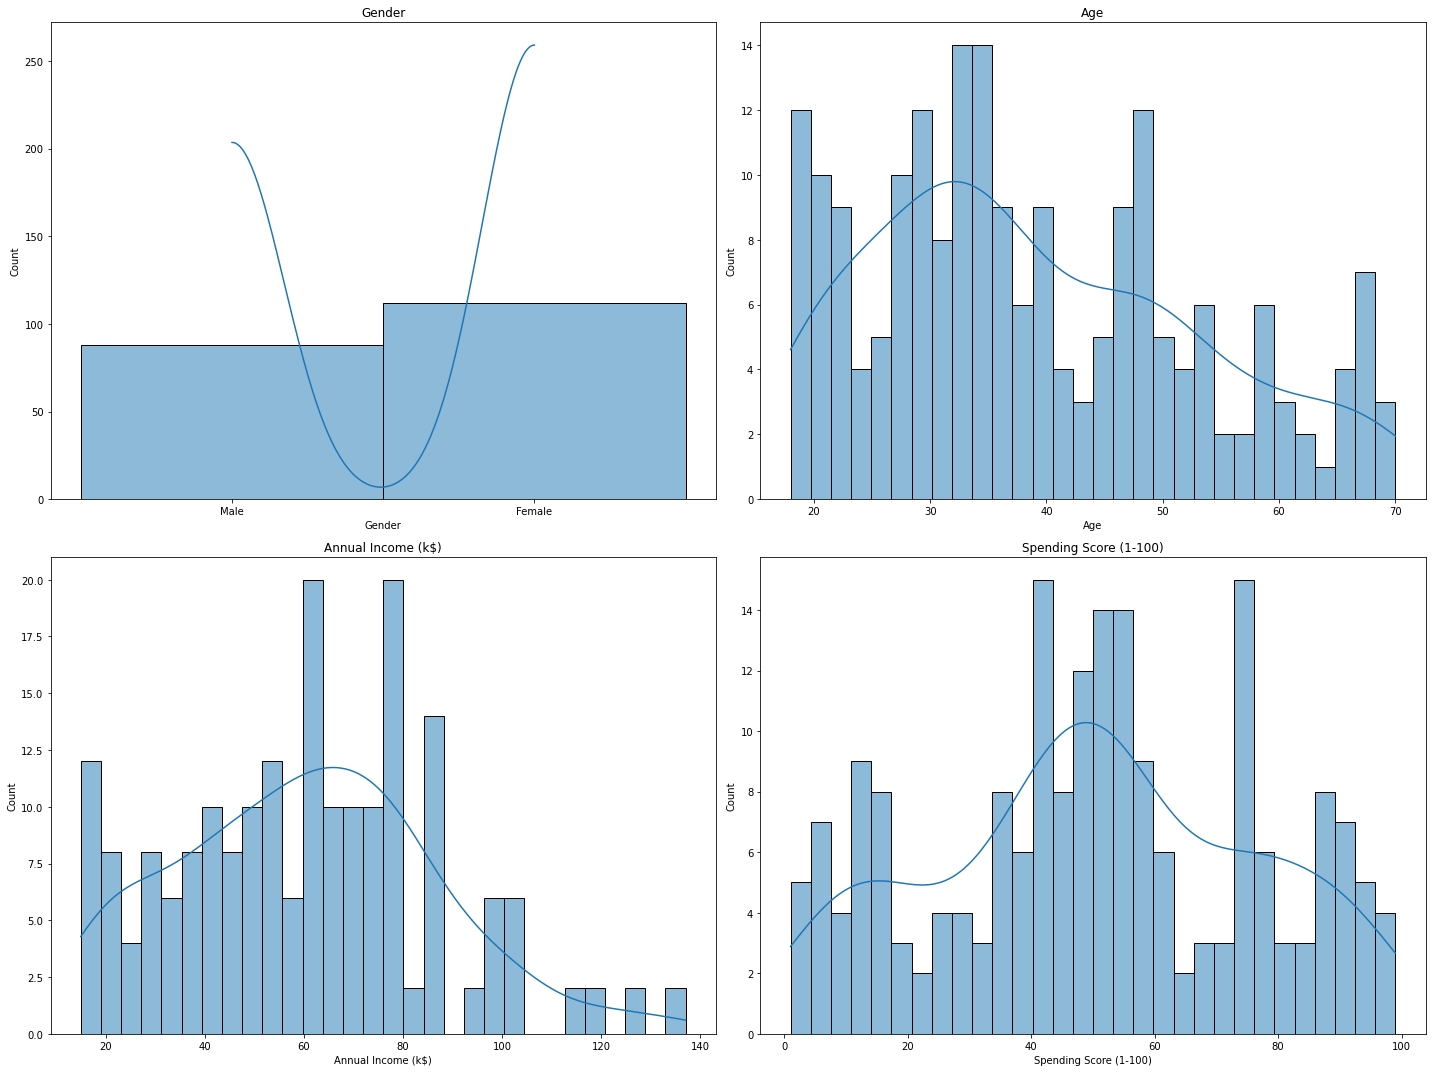

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,15))

# 각 열에 대해 히스토그램
for i, col in enumerate(df.columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'{col}')
    
plt.tight_layout()

plt.show()


In [8]:
from sklearn.preprocessing import StandardScaler

df = pd.get_dummies(df, columns=['Gender'])

scaler = StandardScaler()

for col in df.columns:
    df[[col]] = scaler.fit_transform(df[[col]])

df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
CustomerID,,,,,
1,-1.424569,-1.738999,-0.434801,-1.128152,1.128152
2,-1.281035,-1.738999,1.195704,-1.128152,1.128152
3,-1.352802,-1.700830,-1.715913,0.886405,-0.886405
4,-1.137502,-1.700830,1.040418,0.886405,-0.886405
5,-0.563369,-1.662660,-0.395980,0.886405,-0.886405
...,...,...,...,...,...
196,-0.276302,2.268791,1.118061,0.886405,-0.886405
197,0.441365,2.497807,-0.861839,0.886405,-0.886405
198,-0.491602,2.497807,0.923953,-1.128152,1.128152


## 2. Clustering

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
K = range(2,10)

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    silhouette_scores.append(silhouette_score(df, kmeans.labels_))

optimal_k = K[silhouette_scores.index(max(silhouette_scores))]
print(f'Optimal clusters: {optimal_k}')


Optimal clusters: 9


In [10]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

eps_values = [0.3, 0.5, 0.7, 1, 1.5, 2]  # 이웃을 정의하기 위한 최대 거리
min_samples_values = [3, 5, 10, 15, 20]  # 핵심 데이터를 정의하기 위한 이웃의 최소 데이터 수

best_eps = None
best_min_samples = None
best_score = -1

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(df)
        
        if len(set(clusters)) > 1:
            score = silhouette_score(df, clusters)
        
            if score > best_score:
                best_eps = eps
                best_min_samples = min_samples
                best_score = score

print('Best eps: ', best_eps)
print('Best min_samples: ', best_min_samples)
print('Best silhouette score: ', best_score)


Best eps:  1.5
Best min_samples:  3
Best silhouette score:  0.39644160577705434


## 3. Evaluation

In [11]:
import numpy as np
from sklearn.metrics import pairwise_distances

def dunn_index(X, labels):
    distances = pairwise_distances(X)

    max_within_cluster_distance = 0
    min_between_cluster_distance = np.inf

    for i in np.unique(labels):
        within_cluster_distance = distances[labels == i][:, labels == i]
        if within_cluster_distance.size > 0:
            max_within_cluster_distance = max(max_within_cluster_distance, within_cluster_distance.max())

        between_cluster_distance = distances[labels == i][:, labels != i]
        if between_cluster_distance.size > 0:
            min_between_cluster_distance = min(min_between_cluster_distance, between_cluster_distance.min())

    return min_between_cluster_distance / max_within_cluster_distance


In [12]:
# KMeans 클러스터링 평가
kmeans = KMeans(n_clusters=optimal_k)
kmeans_clusters = kmeans.fit_predict(df)

kmeans_silhouette = silhouette_score(df, kmeans_clusters)
kmeans_dunn = dunn_index(df.values, kmeans_clusters)

print('KMeans silhouette score: ', kmeans_silhouette)
print('KMeans Dunn index: ', kmeans_dunn)

# DBSCAN 클러스터링 평가
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_clusters = dbscan.fit_predict(df)

dbscan_silhouette = silhouette_score(df, dbscan_clusters)
dbscan_dunn = dunn_index(df.values, dbscan_clusters)

print('DBSCAN silhouette score: ', dbscan_silhouette)
print('DBSCAN Dunn index: ', dbscan_dunn)


KMeans silhouette score:  0.4192788144704337
KMeans Dunn index:  0.10697203654325164
DBSCAN silhouette score:  0.39644160577705434
DBSCAN Dunn index:  0.475769866601355
